In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import scipy.stats as stats

In [2]:
path="./updated_datasets_distrubutions/"
csv_files = glob.glob(path+'final*.csv')


dataframes = {os.path.basename(file): pd.read_csv(file) for file in csv_files}


In [3]:
def plot_column_distributions(column_name):
    plt.figure(figsize=(10, 6))
    for name, df in dataframes.items():
        sns.kdeplot(df[column_name], label=name.split(".")[0].split("_")[2], fill=True, alpha=0.5)
    plt.title(f"Distribution Comparison for {column_name}")
    plt.legend()
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.show()


In [4]:
def plot_column_boxplots(column_name):
    plt.figure(figsize=(10, 6))
    
    data = []
    labels = []
    
    for name, df in dataframes.items():
        labels.append(name.split(".")[0].split("_")[2])  
    
    sns.boxplot(data=data)
    
    plt.xticks(ticks=range(len(labels)), labels=labels)
    plt.title(f"Boxplot Comparison for {column_name}")
    plt.xlabel('Dataframes')
    plt.ylabel(column_name)
    
    plt.show()


In [5]:
def plot_column_timestamps(column):
    plt.figure(figsize=(10, 6))

    for name, df in dataframes.items():
        df[column] = pd.to_datetime(df[column])
        df[column].value_counts().sort_index().plot(label=name.split(".")[0].split("_")[2], alpha=0.5)

    plt.title(f"Timestamps Comparison for {column}")
    plt.xlabel("time")
    plt.ylabel(column)
    plt.legend()
    plt.show()


#using timestamps is so bad for this dataset


In [6]:
def plot_column_min_max(column_name_without_min_max):
    plt.figure(figsize=(10, 6))
    
    for name, df in dataframes.items():
        df[column_name_without_min_max + "/min"].plot(label=name.split(".")[0].split("_")[2] + "_min", alpha=0.5)
        df[column_name_without_min_max + "/max"].plot(label=name.split(".")[0].split("_")[2] + "_max", alpha=0.5)
    
    plt.title(f"Min-Max Comparison for {column_name_without_min_max}")
    plt.xlabel("time")
    plt.ylabel(column_name_without_min_max)
    plt.legend()
    plt.show()

In [7]:
def plot_histogram_analysis_using_column(column_name):
    plt.figure(figsize=(10, 6))
    
    for name, df in dataframes.items():
        df[column_name].hist(label=name.split(".")[0].split("_")[2], alpha=0.5, bins=30)
    
    plt.title(f"Histogram Comparison for {column_name}")
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [8]:
def plot_column_correlation(column_name):
    plt.figure(figsize=(10, 6))
    
    correlation_matrix = pd.concat([df[column_name] for df in dataframes.values()], axis=1).corr()
    
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    
    plt.title(f"Correlation Matrix for {column_name}")
    plt.show()

In [9]:
def plot_column_aggregated(column_name):
    plt.figure(figsize=(10, 6))
    
    for name, df in dataframes.items():
        df[column_name].value_counts().plot(kind='bar', label=name.split(".")[0].split("_")[2], alpha=0.5)
    
    plt.title(f"Aggregated Comparison for {column_name}")
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [10]:
def plot_column_ecdf(column_name):
    plt.figure(figsize=(10, 6))
    
    for name, df in dataframes.items():
        x = np.sort(df[column_name])
        y = np.arange(1, len(x) + 1) / len(x)
        plt.plot(x, y, label=name.split(".")[0].split("_")[2], alpha=0.5)
    
    plt.title(f"ECDF Comparison for {column_name}")
    plt.xlabel(column_name)
    plt.ylabel('ECDF')
    plt.legend()
    plt.show()

In [11]:
def find_mean(column_name):
    for df in dataframes.values():
        return df[column_name+"/mean"].mean()

In [12]:
def find_stDev(column_name):
    for df in dataframes.values():
        return df[column_name+"/stDev"].std()

In [13]:
def plot_column_zscore(column_name_without_min_max):
    plt.figure(figsize=(10, 6))

    for name, df in dataframes.items():
        
        mean= find_mean(column_name_without_min_max)
        stDev= find_stDev(column_name_without_min_max)
        x= np.linspace(mean- 3*stDev, mean + 3 * stDev, 100)

        y= stats.norm.pdf(x,mean,stDev)


        plt.plot(x,y, label=name.split(".")[0].split("_")[2], alpha=0.5)
    
    plt.title(f"Z-Score Comparison for {column_name_without_min_max}")
    plt.xlabel("x")
    plt.ylabel(column_name_without_min_max)
    plt.legend()
    plt.show()

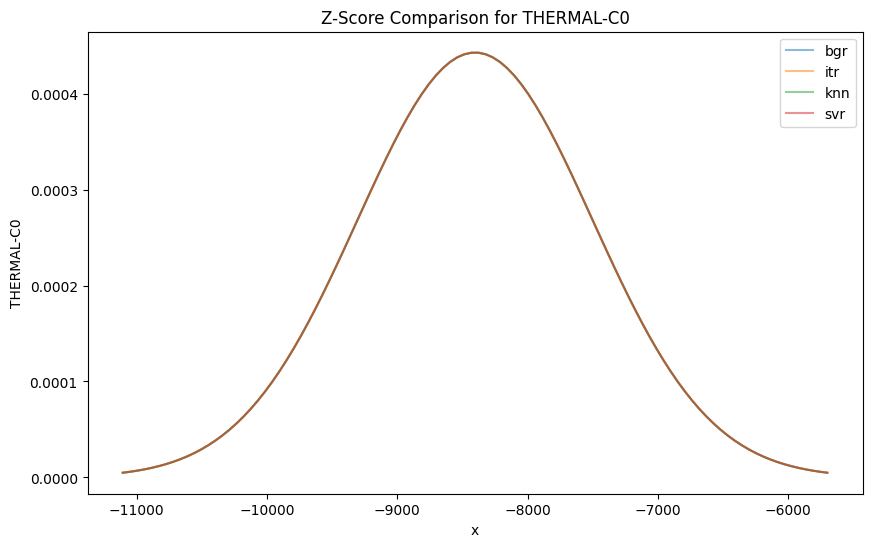

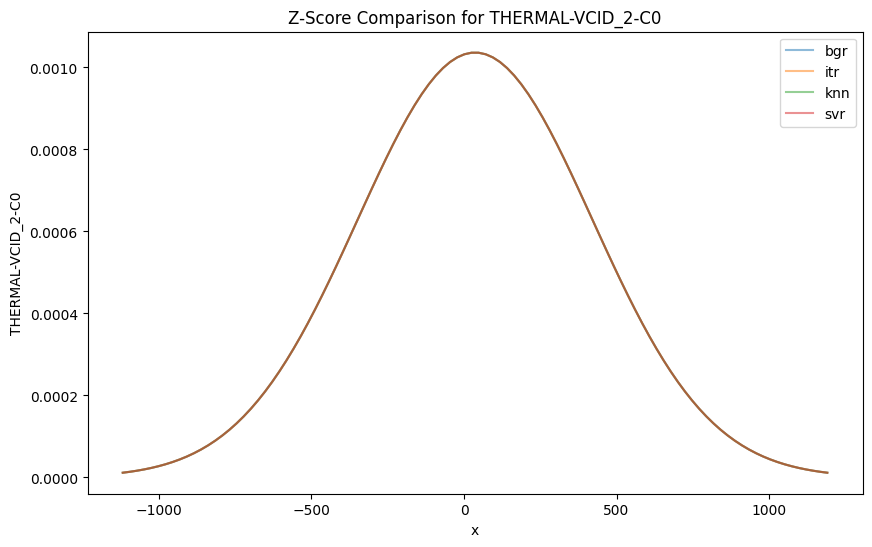

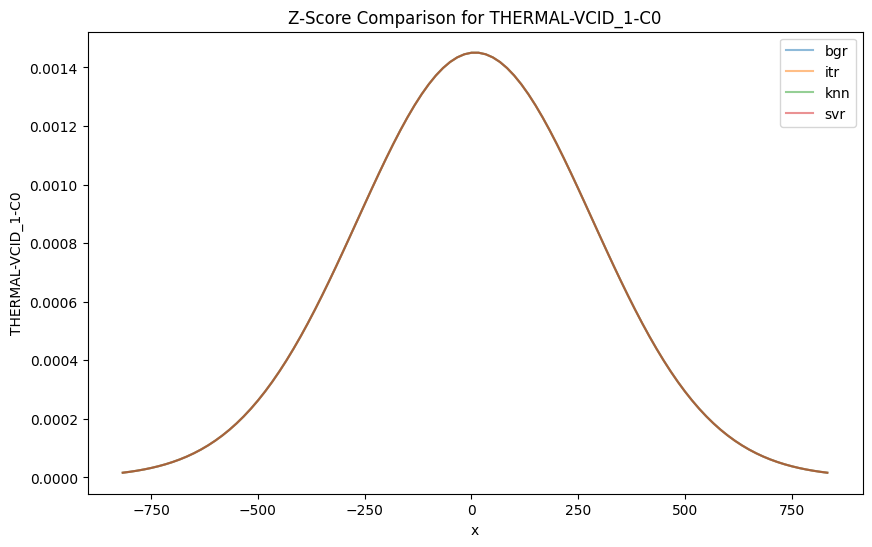

In [14]:
columns_to_compare = ['THERMAL-C0',
                       'THERMAL-VCID_2-C0', 
                       'THERMAL-VCID_1-C0']
for column in columns_to_compare:
    plot_column_zscore(column)